In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy
import time

In [5]:
# create arrays of random latitudes and longitudes
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# join arrays in pairs. 
lat_lngs = zip(lats,lngs)

lat_lngs

In [6]:
coordinates = list(lat_lngs)

In [7]:
# create a list of random cities using citipy and generated random coordinates
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)
    

627

In [8]:
# create api url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval ")
print("-------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all cities
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create url for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    # log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to record count
    record_count += 1
    
    # run API request for each city
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # get data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # append the city data to list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print('City Found')
        # if an error is experienced
    except:
        print("City not found. Skipping...")
        pass

# indicate the Data Loading is complete
print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")
        

Beginning Data Retrieval 
-------------------------
Processing Record 1 of Set 1 | gua musang
City Found
Processing Record 2 of Set 1 | la rioja
City Found
Processing Record 3 of Set 1 | port alfred
City Found
Processing Record 4 of Set 1 | tasiilaq
City Found
Processing Record 5 of Set 1 | the pas
City Found
Processing Record 6 of Set 1 | namibe
City Found
Processing Record 7 of Set 1 | caravelas
City Found
Processing Record 8 of Set 1 | richards bay
City Found
Processing Record 9 of Set 1 | palatka
City Found
Processing Record 10 of Set 1 | codrington
City Found
Processing Record 11 of Set 1 | jamestown
City Found
Processing Record 12 of Set 1 | ekibastuz
City Found
Processing Record 13 of Set 1 | beloha
City Found
Processing Record 14 of Set 1 | faanui
City Found
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | ketchikan
City Found
Processing Record 17 of Set 1 | victoria point
City Found
Processing Record 18 of Set 1 | mulchen
Cit

City Found
Processing Record 4 of Set 4 | ilulissat
City Found
Processing Record 5 of Set 4 | luderitz
City Found
Processing Record 6 of Set 4 | kodiak
City Found
Processing Record 7 of Set 4 | ambilobe
City Found
Processing Record 8 of Set 4 | maragogi
City Found
Processing Record 9 of Set 4 | cortez
City Found
Processing Record 10 of Set 4 | karratha
City Found
Processing Record 11 of Set 4 | mayor pablo lagerenza
City Found
Processing Record 12 of Set 4 | tarko-sale
City Found
Processing Record 13 of Set 4 | avarua
City Found
Processing Record 14 of Set 4 | edinet
City Found
Processing Record 15 of Set 4 | brae
City Found
Processing Record 16 of Set 4 | mahibadhoo
City Found
Processing Record 17 of Set 4 | tawkar
City not found. Skipping...
Processing Record 18 of Set 4 | nadvoitsy
City Found
Processing Record 19 of Set 4 | hithadhoo
City Found
Processing Record 20 of Set 4 | manadhoo
City Found
Processing Record 21 of Set 4 | kloulklubed
City Found
Processing Record 22 of Set 4 | m

City Found
Processing Record 5 of Set 7 | esna
City Found
Processing Record 6 of Set 7 | leh
City Found
Processing Record 7 of Set 7 | kashan
City Found
Processing Record 8 of Set 7 | mambajao
City Found
Processing Record 9 of Set 7 | dukat
City Found
Processing Record 10 of Set 7 | lugus
City Found
Processing Record 11 of Set 7 | marang
City Found
Processing Record 12 of Set 7 | fairbanks
City Found
Processing Record 13 of Set 7 | puerto ayora
City Found
Processing Record 14 of Set 7 | katha
City not found. Skipping...
Processing Record 15 of Set 7 | puerto escondido
City Found
Processing Record 16 of Set 7 | lompoc
City Found
Processing Record 17 of Set 7 | beinamar
City Found
Processing Record 18 of Set 7 | los mochis
City Found
Processing Record 19 of Set 7 | formoso do araguaia
City not found. Skipping...
Processing Record 20 of Set 7 | kaeo
City Found
Processing Record 21 of Set 7 | benguela
City Found
Processing Record 22 of Set 7 | partenit
City Found
Processing Record 23 of Se

City Found
Processing Record 8 of Set 10 | garowe
City Found
Processing Record 9 of Set 10 | tshela
City Found
Processing Record 10 of Set 10 | slave lake
City Found
Processing Record 11 of Set 10 | havre-saint-pierre
City Found
Processing Record 12 of Set 10 | albion
City Found
Processing Record 13 of Set 10 | araouane
City Found
Processing Record 14 of Set 10 | sistranda
City Found
Processing Record 15 of Set 10 | saint-pierre
City Found
Processing Record 16 of Set 10 | dwarka
City Found
Processing Record 17 of Set 10 | nouadhibou
City Found
Processing Record 18 of Set 10 | wajima
City Found
Processing Record 19 of Set 10 | kuna
City Found
Processing Record 20 of Set 10 | dabola
City Found
Processing Record 21 of Set 10 | sao jose do belmonte
City Found
Processing Record 22 of Set 10 | bubaque
City Found
Processing Record 23 of Set 10 | kelso
City Found
Processing Record 24 of Set 10 | maunabo
City Found
Processing Record 25 of Set 10 | cardross
City Found
Processing Record 26 of Set

City Found
Processing Record 11 of Set 13 | iqaluit
City Found
Processing Record 12 of Set 13 | oliveira dos brejinhos
City Found
Processing Record 13 of Set 13 | san cristobal
City Found
Processing Record 14 of Set 13 | timizart
City Found
Processing Record 15 of Set 13 | kahului
City Found
Processing Record 16 of Set 13 | vila velha
City Found
Processing Record 17 of Set 13 | kizukuri
City Found
Processing Record 18 of Set 13 | polyarnyy
City Found
Processing Record 19 of Set 13 | necochea
City Found
Processing Record 20 of Set 13 | jiwani
City Found
Processing Record 21 of Set 13 | benghazi
City Found
Processing Record 22 of Set 13 | vidalia
City Found
Processing Record 23 of Set 13 | high level
City Found
Processing Record 24 of Set 13 | pinawa
City Found
Processing Record 25 of Set 13 | andenes
City Found
Processing Record 26 of Set 13 | tual
City Found
Processing Record 27 of Set 13 | phayao
City Found
--------------------------
Data Retrieval Complete   
------------------------

In [9]:
# tally cities in city_data
len(city_data)

580

In [10]:
# convert weather data to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gua Musang,4.8823,101.9644,77.72,94,100,1.19,MY,2022-09-10 03:21:21
1,La Rioja,42.2500,-2.5000,49.78,78,14,3.74,ES,2022-09-10 03:21:22
2,Port Alfred,-33.5906,26.8910,58.17,97,4,1.01,ZA,2022-09-10 03:21:22
3,Tasiilaq,65.6145,-37.6368,42.96,65,6,6.24,GL,2022-09-10 03:21:23
4,The Pas,53.8251,-101.2541,51.82,66,100,11.50,CA,2022-09-10 03:21:23
5,Namibe,-15.1961,12.1522,65.28,89,81,2.84,AO,2022-09-10 03:21:24
6,Caravelas,-17.7125,-39.2481,68.25,76,0,6.51,BR,2022-09-10 03:21:24
7,Richards Bay,-28.7830,32.0377,66.74,93,49,2.17,ZA,2022-09-10 03:21:25
8,Palatka,29.6486,-81.6376,76.96,99,98,3.06,US,2022-09-10 03:21:25
9,Codrington,-38.2667,141.9667,51.94,67,94,16.55,AU,2022-09-10 03:21:26


In [11]:
# reorder columns
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gua Musang,MY,2022-09-10 03:21:21,4.8823,101.9644,77.72,94,100,1.19
1,La Rioja,ES,2022-09-10 03:21:22,42.2500,-2.5000,49.78,78,14,3.74
2,Port Alfred,ZA,2022-09-10 03:21:22,-33.5906,26.8910,58.17,97,4,1.01
3,Tasiilaq,GL,2022-09-10 03:21:23,65.6145,-37.6368,42.96,65,6,6.24
4,The Pas,CA,2022-09-10 03:21:23,53.8251,-101.2541,51.82,66,100,11.50
5,Namibe,AO,2022-09-10 03:21:24,-15.1961,12.1522,65.28,89,81,2.84
6,Caravelas,BR,2022-09-10 03:21:24,-17.7125,-39.2481,68.25,76,0,6.51
7,Richards Bay,ZA,2022-09-10 03:21:25,-28.7830,32.0377,66.74,93,49,2.17
8,Palatka,US,2022-09-10 03:21:25,29.6486,-81.6376,76.96,99,98,3.06
9,Codrington,AU,2022-09-10 03:21:26,-38.2667,141.9667,51.94,67,94,16.55


In [12]:
# create output file
output_data_file = 'weather_data/cities.csv'

# export dataframe to file
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [29]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

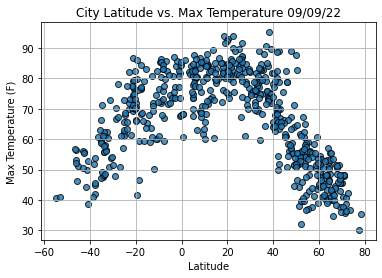

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


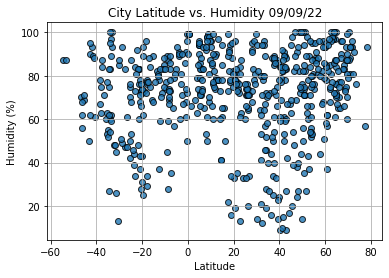

In [51]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")


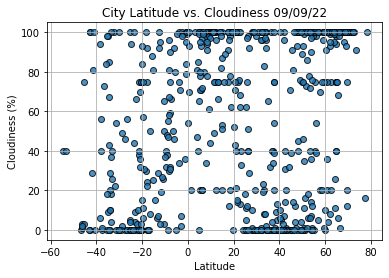

In [52]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")


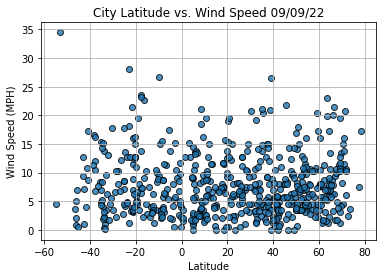

In [53]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
